# Data Cleansing

### Insights 
Problem Statement: How can organizations optimize their global talent acquisition and compensation strategies by analyzing the key drivers of salary variation in Data Science, Machine Learning, and AI roles in 2025?

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean

df = pd.read_csv("salaries.csv")

In [72]:
df.duplicated().sum()  # Number of duplicate rows
df = df.drop_duplicates()

In [73]:
# Convert coded values to readable labels (optional)
exp_map = {'EN': 'Entry-level', 'MI': 'Mid-level', 'SE': 'Senior', 'EX': 'Executive'}
df['experience_level'] = df['experience_level'].map(exp_map)

size_map = {'S': 'Small', 'M': 'Medium', 'L': 'Large'}
df['company_size'] = df['company_size'].map(size_map)

### Salary by experience level

In [74]:
df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)

experience_level
Executive      201167.041418
Senior         167831.982119
Mid-level      136625.381119
Entry-level     97892.494908
Name: salary_in_usd, dtype: float64

### Remote vs Onsite Salary

In [75]:
df['remote_status'] = df['remote_ratio'].apply(lambda x: 'Remote' if x == 100 else ('Hybrid' if x > 0 else 'On-site'))
df.groupby('remote_status')['salary_in_usd'].mean()

remote_status
Hybrid      81625.033742
On-site    152186.577255
Remote     149213.231412
Name: salary_in_usd, dtype: float64

### Top Paying Job Titles

In [76]:
df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

job_title
Research Team Lead               450000.000000
Analytics Engineering Manager    399880.000000
Data Science Tech Lead           375000.000000
Applied AI ML Lead               292500.000000
IT Enterprise Data Architect     284090.000000
Head of Applied AI               278500.000000
Head of Machine Learning         276100.692308
Director of Data                 270000.000000
Director of Machine Learning     265200.000000
AIRS Solutions Specialist        263250.000000
Name: salary_in_usd, dtype: float64

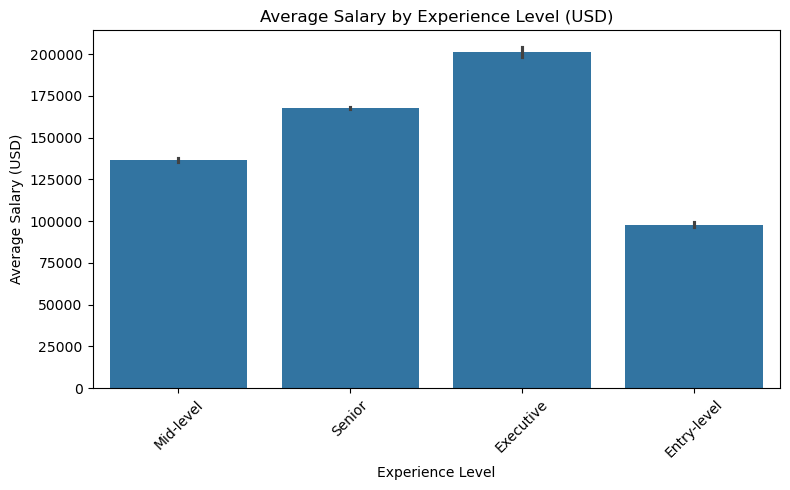

In [77]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='experience_level', y='salary_in_usd', estimator=mean)
plt.title('Average Salary by Experience Level (USD)')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [78]:
df['remote_status'] = df['remote_ratio'].apply(
    lambda x: 'Remote' if x == 100 else ('Hybrid' if x > 0 else 'On-site')
)


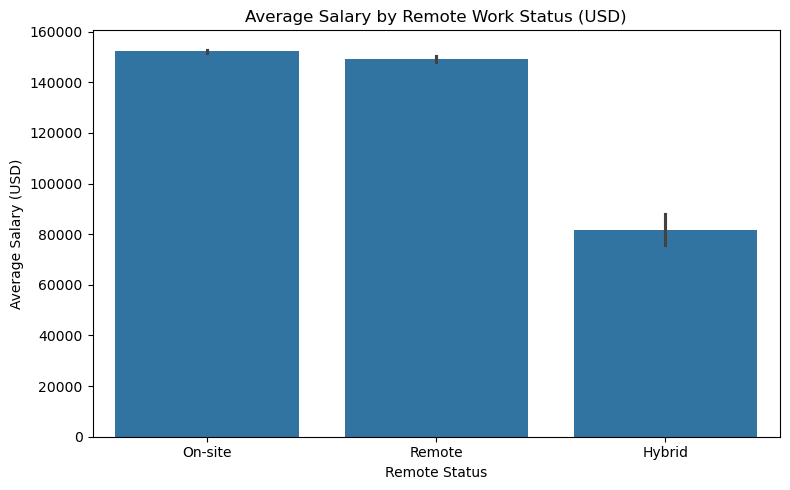

In [79]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='remote_status', y='salary_in_usd', estimator=mean)
plt.title('Average Salary by Remote Work Status (USD)')
plt.xlabel('Remote Status')
plt.ylabel('Average Salary (USD)')
plt.tight_layout()
plt.show()

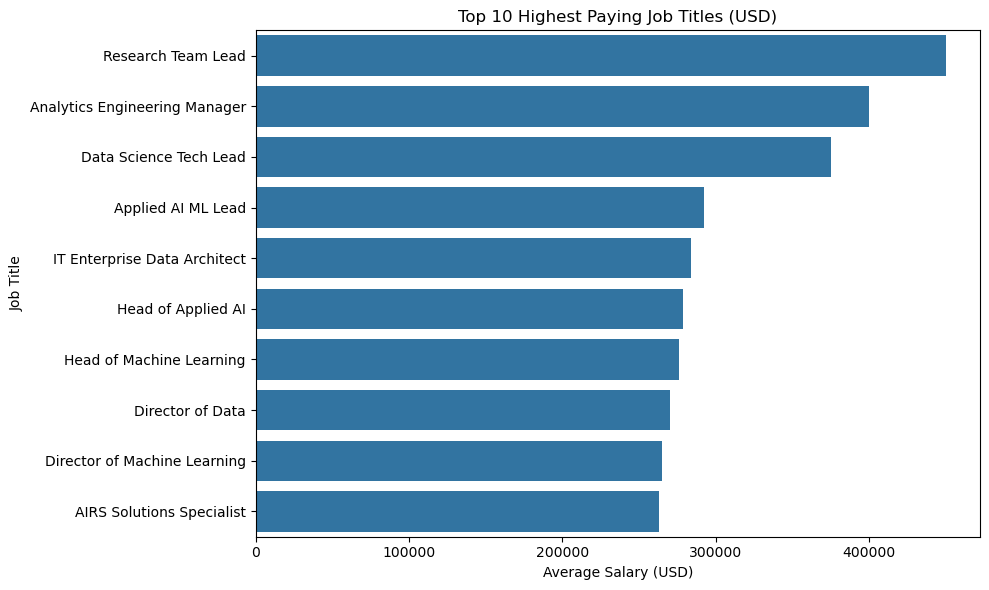

In [80]:
top_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_jobs.values, y=top_jobs.index, orient='h')
plt.title('Top 10 Highest Paying Job Titles (USD)')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()


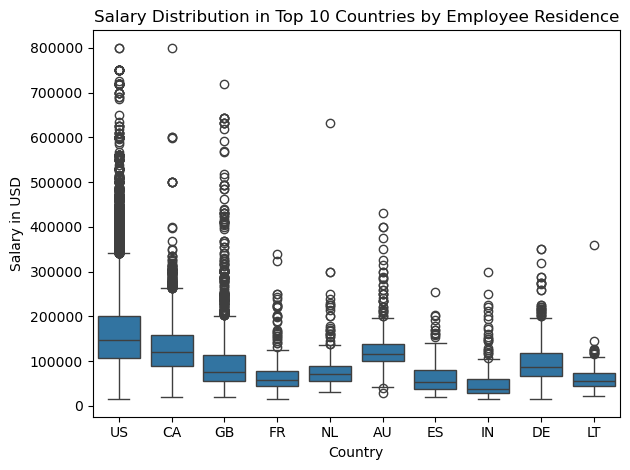

In [81]:
top_countries = df['employee_residence'].value_counts().head(10).index
top_countries_df = df[df['employee_residence'].isin(top_countries)]

sns.boxplot(data=top_countries_df, x='employee_residence', y='salary_in_usd')
plt.title('Salary Distribution in Top 10 Countries by Employee Residence')
plt.xlabel('Country')
plt.ylabel('Salary in USD')
plt.tight_layout()
plt.show()

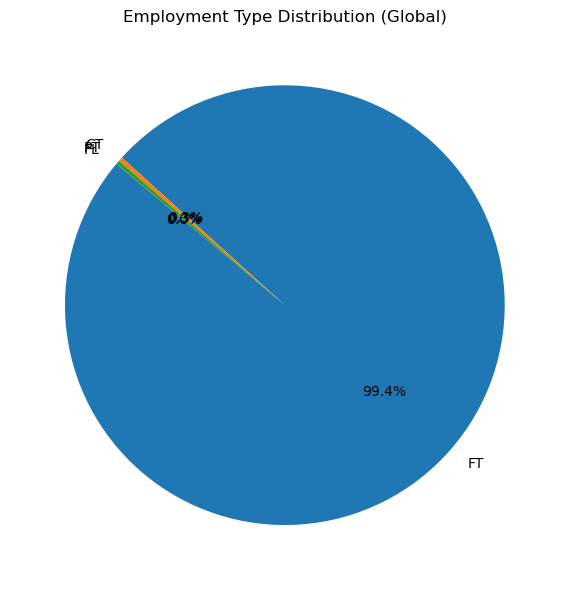

In [91]:
df = pd.read_csv("salaries.csv")

df['experience_level'] = df['experience_level'].map({'EN': 'Entry-level', 'MI': 'Mid-level', 'SE': 'Senior', 'EX': 'Executive'})
df['company_size'] = df['company_size'].map({'S': 'Small', 'M': 'Medium', 'L': 'Large'})
df['remote_status'] = df['remote_ratio'].apply(lambda x: 'Remote' if x == 100 else ('Hybrid' if x > 0 else 'On-site'))

employment_dist = df['employment_type'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(employment_dist, labels=employment_dist.index, autopct='%1.1f%%', startangle=140)
plt.title('Employment Type Distribution (Global)')
plt.tight_layout()
plt.show()

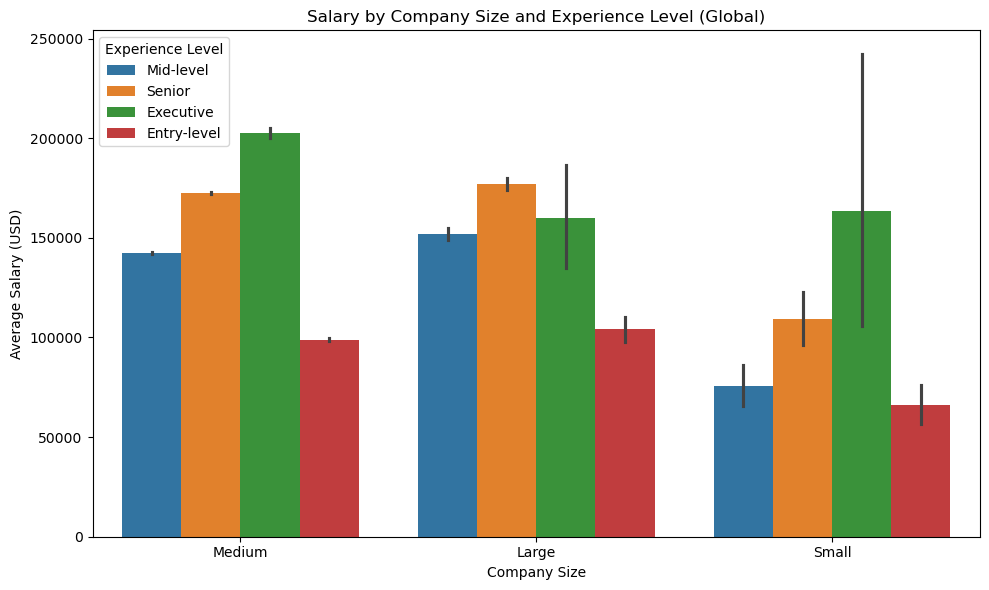

In [92]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='company_size', y='salary_in_usd', hue='experience_level', estimator=np.mean)
plt.title('Salary by Company Size and Experience Level (Global)')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')
plt.legend(title='Experience Level')
plt.tight_layout()
plt.show()

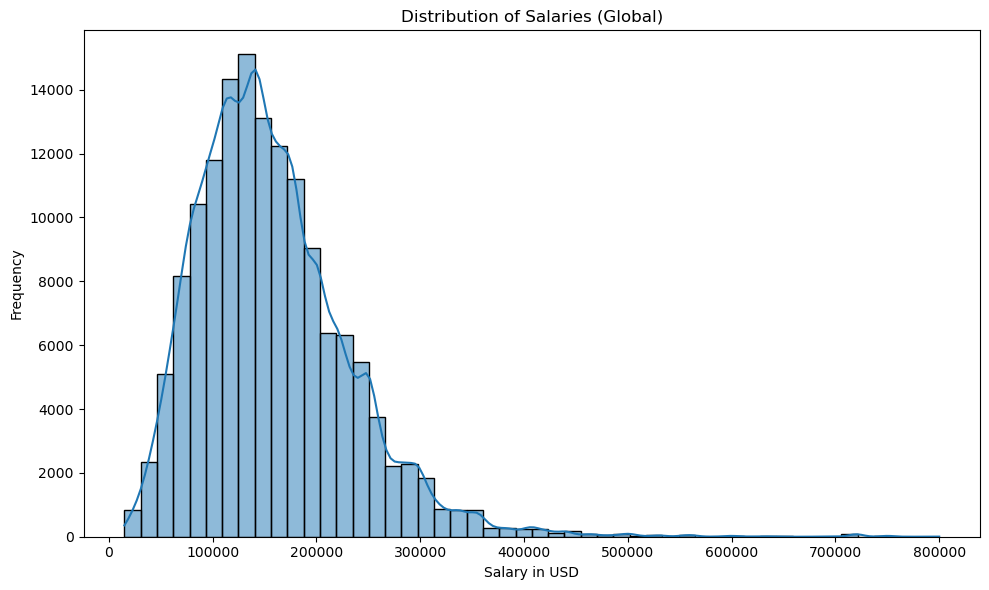

In [93]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=50, kde=True)
plt.title('Distribution of Salaries (Global)')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

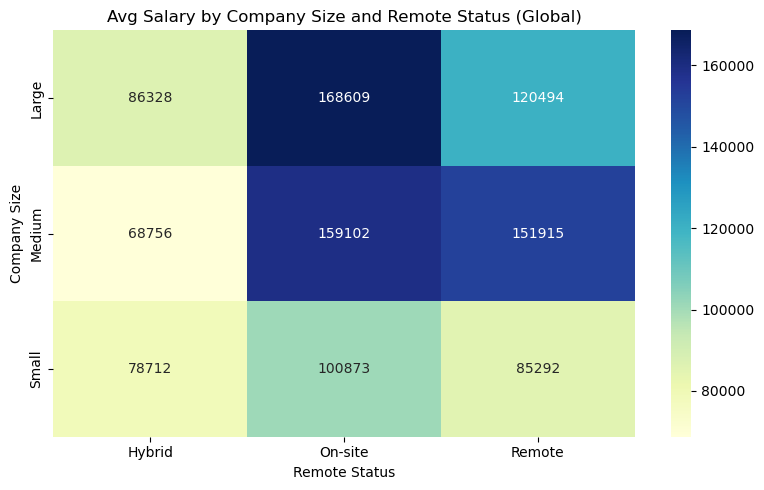

In [58]:
heatmap_data = df.groupby(['company_size', 'remote_status'])['salary_in_usd'].mean().unstack()
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Avg Salary by Company Size and Remote Status (Global)')
plt.xlabel('Remote Status')
plt.ylabel('Company Size')
plt.tight_layout()
plt.show()

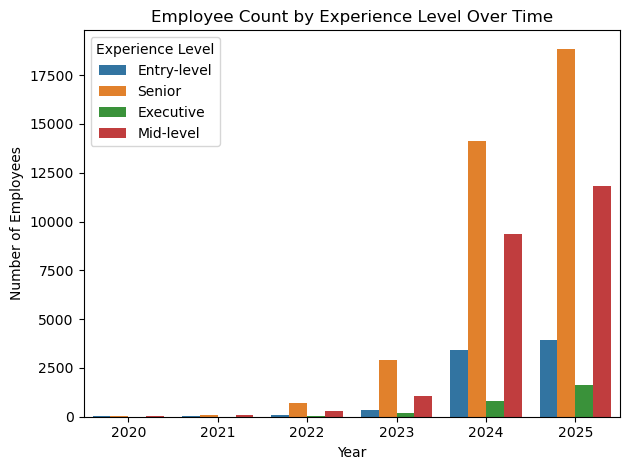

In [82]:
sns.countplot(data=df, x='work_year', hue='experience_level')
plt.title('Employee Count by Experience Level Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.legend(title='Experience Level')
plt.tight_layout()
plt.show()


In [83]:
yearly_salary = (
    df.groupby('work_year')['salary_in_usd']
      .mean()
      .reset_index()
      .sort_values('work_year')
)

yearly_salary.rename(columns={'salary_in_usd':'avg_salary_usd'}, inplace=True)

yearly_salary['SMA_2'] = yearly_salary['avg_salary_usd'].rolling(window=2).mean()
yearly_salary['SMA_3'] = yearly_salary['avg_salary_usd'].rolling(window=3).mean()

yearly_salary['EMA_3'] = yearly_salary['avg_salary_usd'].ewm(span=3, adjust=False).mean()


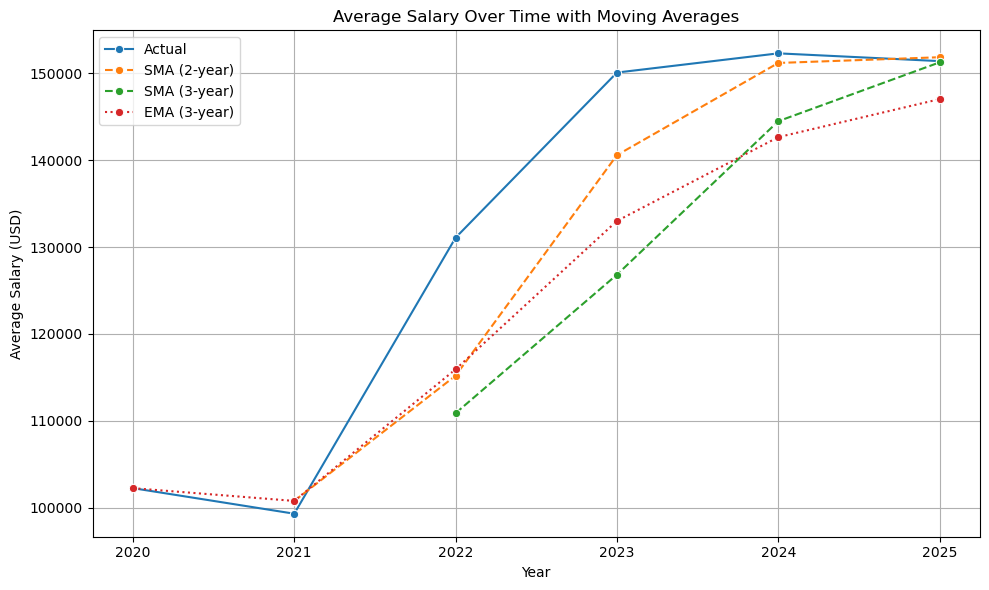

In [84]:
plt.figure(figsize=(10,6))

#Actual
sns.lineplot(
    data=yearly_salary, x='work_year', y='avg_salary_usd',
    marker='o', label='Actual'
)

# SMA(2)
sns.lineplot(
    data=yearly_salary, x='work_year', y='SMA_2',
    marker='o', linestyle='--', label='SMA (2-year)'
)

# SMA(3)
sns.lineplot(
    data=yearly_salary, x='work_year', y='SMA_3',
    marker='o', linestyle='--', label='SMA (3-year)'
)

# EMA(3)
sns.lineplot(
    data=yearly_salary, x='work_year', y='EMA_3',
    marker='o', linestyle=':', label='EMA (3-year)'
)

plt.title('Average Salary Over Time with Moving Averages')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

             R2 Score          MAE         RMSE
Polynomial   0.882190  6130.835441  7757.346801
Square Root  0.836958  7843.842197  9125.798130


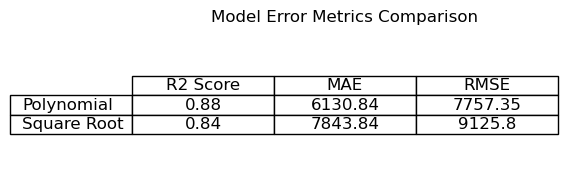

In [87]:
# Recompute necessary inputs
yearly_salary = df.groupby('work_year')['salary_in_usd'].mean().reset_index()
X = yearly_salary[['work_year']]
y = yearly_salary['salary_in_usd']

# Polynomial Regression (degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, y)
y_pred_poly = poly_model.predict(X)

# Square Root Regression
X_sqrt = np.sqrt(X)
sqrt_model = LinearRegression()
sqrt_model.fit(X_sqrt, y)
y_pred_sqrt = sqrt_model.predict(X_sqrt)

# Evaluation function
def evaluate_model(y_true, y_pred):
    return {
        "R2 Score": r2_score(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred))
    }

# Get metrics
poly_errors = evaluate_model(y, y_pred_poly)
sqrt_errors = evaluate_model(y, y_pred_sqrt)

# Create table
metrics_df = pd.DataFrame([poly_errors, sqrt_errors], index=['Polynomial', 'Square Root'])
print(metrics_df)

# Optional: Plot as visual table
plt.figure(figsize=(6, 2))
plt.axis('off')
tbl = plt.table(cellText=metrics_df.round(2).values,
                rowLabels=metrics_df.index,
                colLabels=metrics_df.columns,
                cellLoc='center',
                loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.2)
plt.title('Model Error Metrics Comparison')
plt.tight_layout()
plt.show()


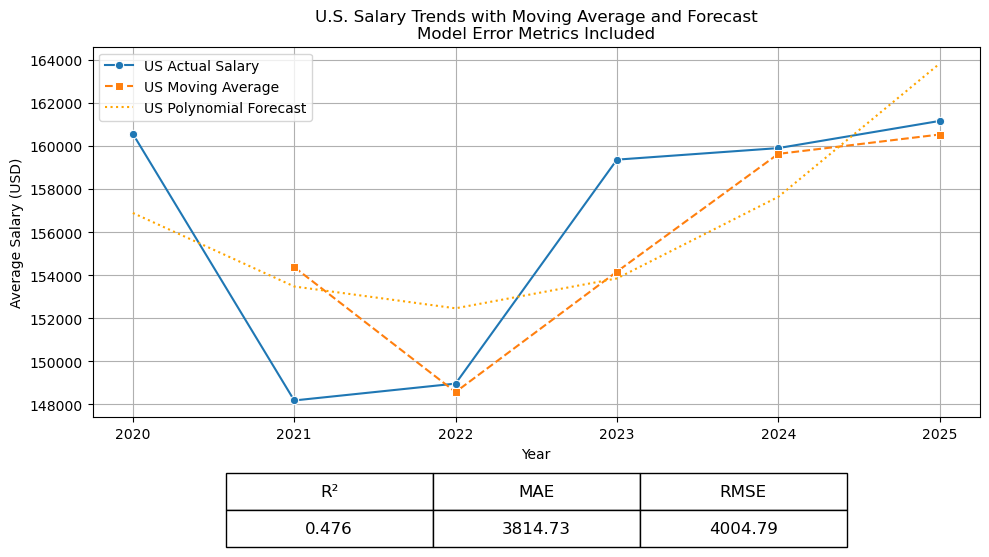

In [88]:
us_df = df[df['employee_residence'] == 'US']

# Step 1: Group by year and calculate mean salary
yearly_salary = us_df.groupby('work_year')['salary_in_usd'].mean().reset_index()
yearly_salary['moving_avg'] = yearly_salary['salary_in_usd'].rolling(window=2).mean()

# Step 2: Polynomial regression model
X = yearly_salary[['work_year']]
y = yearly_salary['salary_in_usd']

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, y)
y_pred = poly_model.predict(X)

# Step 3: Error metrics
errors = {
    "R²": round(r2_score(y, y_pred), 3),
    "MAE": round(mean_absolute_error(y, y_pred), 2),
    "RMSE": round(np.sqrt(mean_squared_error(y, y_pred)), 2)
}
error_df = pd.DataFrame([errors])

# Step 4: Plot US-specific trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_salary, x='work_year', y='salary_in_usd', label='US Actual Salary', marker='o')
sns.lineplot(data=yearly_salary, x='work_year', y='moving_avg', label='US Moving Average', linestyle='--', marker='s')
plt.plot(X, y_pred, label='US Polynomial Forecast', linestyle=':', color='orange')

plt.title('U.S. Salary Trends with Moving Average and Forecast\nModel Error Metrics Included')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.legend()
plt.grid(True)

# Add table with error metrics
table = plt.table(
    cellText=error_df.values,
    colLabels=error_df.columns,
    cellLoc='center',
    loc='bottom',
    bbox=[0.15, -0.35, 0.7, 0.2]
)
table.set_fontsize(12)
table.scale(1, 1.5)

plt.tight_layout()
plt.show()


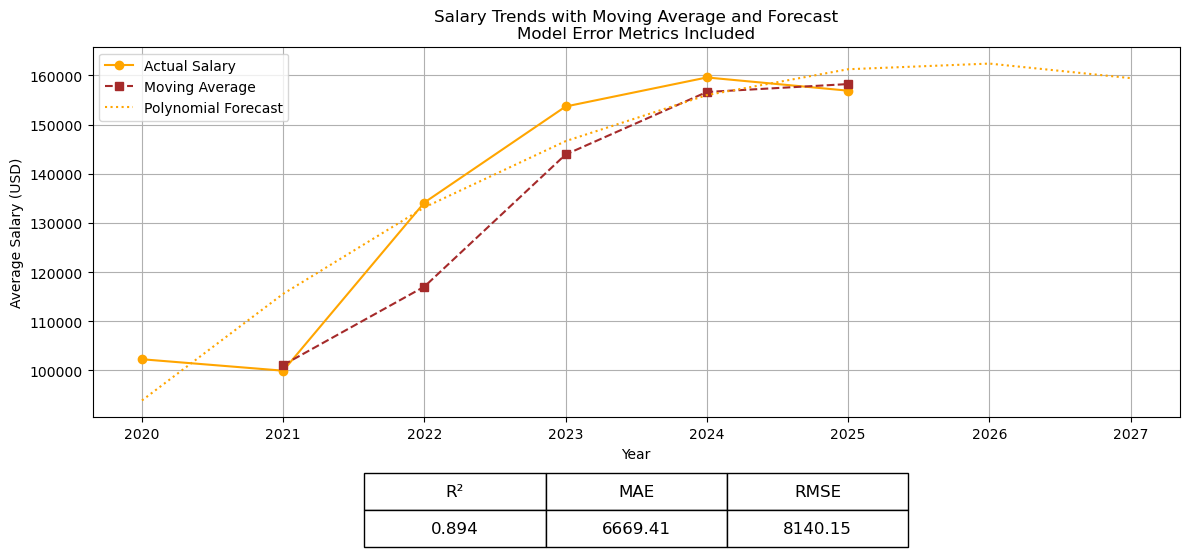

In [90]:
# Load dataset
df = pd.read_csv("salaries.csv")

# Group by year and get mean salary
global_df = df.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Calculate 2-year Simple Moving Average
global_df['SMA'] = global_df['salary_in_usd'].rolling(window=2).mean()

# Polynomial Regression Model
X = global_df[['work_year']]
y = global_df['salary_in_usd']
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, y)

# Forecast for 2026 & 2027
future_years = pd.DataFrame({'work_year': list(range(global_df['work_year'].min(), 2028))})
forecast = poly_model.predict(future_years)

# Forecasting error metrics on known years
y_pred = poly_model.predict(X)
r2 = round(r2_score(y, y_pred), 3)
mae = round(mean_absolute_error(y, y_pred), 2)
rmse = round(np.sqrt(mean_squared_error(y, y_pred)), 2)
error_table = pd.DataFrame([{"R²": r2, "MAE": mae, "RMSE": rmse}])

# Plot chart
plt.figure(figsize=(12, 6))
plt.plot(global_df['work_year'], global_df['salary_in_usd'], marker='o', color='orange', label='Actual Salary')
plt.plot(global_df['work_year'], global_df['SMA'], marker='s', linestyle='--', color='brown', label='Moving Average')
plt.plot(future_years['work_year'], forecast, linestyle=':', color='orange', label='Polynomial Forecast')

plt.title('Salary Trends with Moving Average and Forecast\nModel Error Metrics Included')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.grid(True)
plt.legend()

# Display error table below the chart
tbl = plt.table(
    cellText=error_table.values,
    colLabels=error_table.columns,
    cellLoc='center',
    loc='bottom',
    bbox=[0.25, -0.35, 0.5, 0.2]
)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.2)

plt.tight_layout()
plt.show()


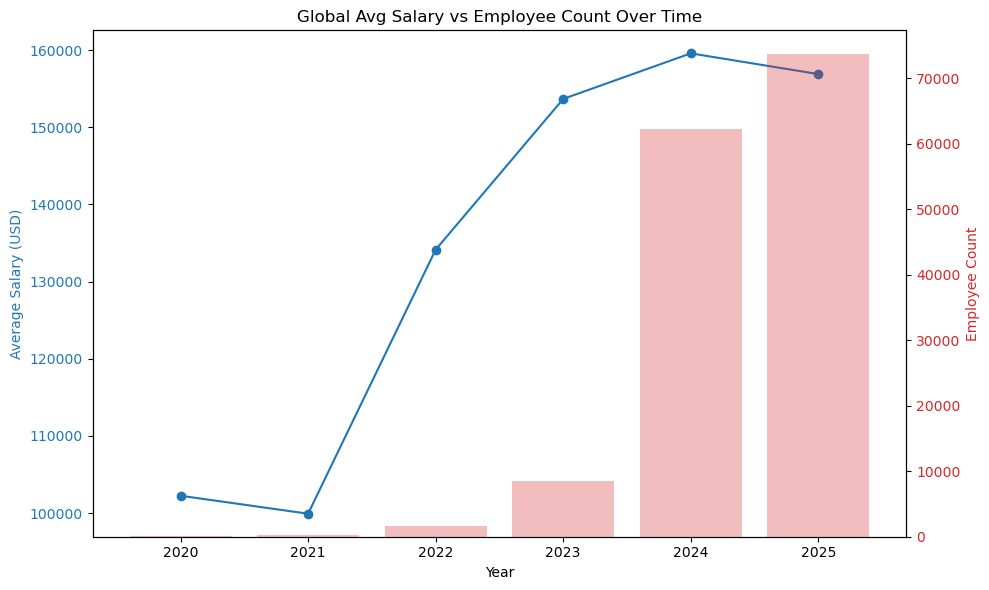

In [94]:
#DUAL COMBO GRAPH: Salary & Employee Count by Year
year_salary = df.groupby('work_year')['salary_in_usd'].mean()
year_count = df['work_year'].value_counts().sort_index()

fig, ax1 = plt.subplots(figsize=(10, 6))
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Salary (USD)', color=color)
ax1.plot(year_salary.index, year_salary.values, color=color, marker='o', label='Avg Salary')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Employee Count', color=color)
ax2.bar(year_count.index, year_count.values, alpha=0.3, color=color, label='Employee Count')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Global Avg Salary vs Employee Count Over Time')
fig.tight_layout()
plt.show()


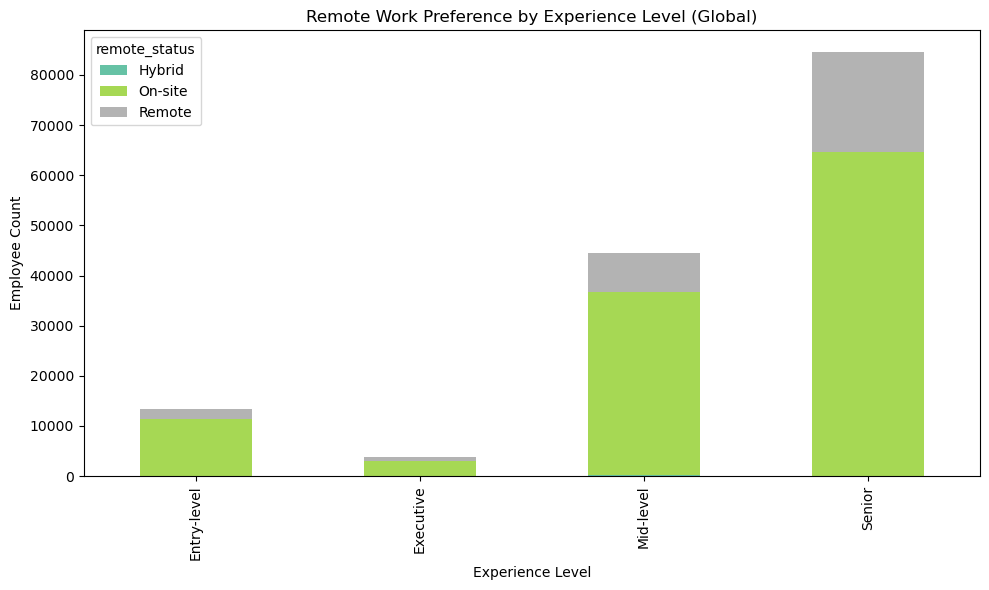

In [95]:
#STACKED BAR CHART: Remote Status by Experience Level
remote_exp = df.groupby(['experience_level', 'remote_status']).size().unstack().fillna(0)
remote_exp.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Remote Work Preference by Experience Level (Global)')
plt.xlabel('Experience Level')
plt.ylabel('Employee Count')
plt.tight_layout()
plt.show()
